In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import sklearn
from sklearn.svm import SVR

In [9]:
data = np.array([1,1.5,3,1,7,8.5,9,9,13,10,11.5,10])
x = np.array([0,1,2,3,4,7,8,9,10,11,12,13])
plt.plot(x,data,'r.')
plt.title('Daten')

In [13]:
coefs = poly.polyfit(x,data, 2)
ffit = poly.Polynomial(coefs)
plt.plot(x,data,'r.')
plt.plot(ffit(np.arange(0, 14, 1)))
plt.title('Nichtlineare Regression Polynom 2.Grades')

In [12]:
coefs = poly.polyfit(x,data, 1)
ffit = poly.Polynomial(coefs)
plt.plot(ffit(np.arange(0, 14, 1)))
plt.plot(x,data,'r.')
plt.title('Lineare Regression')

In [6]:
coefs = poly.polyfit(x,data, 3)
ffit = poly.Polynomial(coefs)
plt.plot(x,data,'r.')
plt.plot(ffit(np.arange(0, 14, 1)))
plt.title('Nichtlineare Regression Polynom 3.Grades')


In [15]:
coefs = poly.polyfit(x,data, 5)
ffit = poly.Polynomial(coefs)
plt.plot(x,data,'r.')
plt.plot(ffit(np.arange(0, 14, 1)))
plt.title('Nichtlineare Regression Polynom 5.Grades')

In [64]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=5.0)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [65]:
data = np.array([[1],[1.5],[3],[1],[7],[8.5],[9],[9],[13],[10],[11.5],[10]])
y_rbf = svr_rbf.fit(data, np.arange(0, 12, 1)).predict(data)
y_lin = svr_lin.fit(data, np.arange(0, 12, 1)).predict(data)
y_poly = svr_poly.fit(data, np.arange(0, 12, 1)).predict(data)

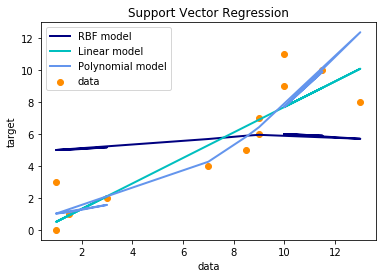

In [66]:
lw = 2
plt.scatter(data, np.arange(0, 12, 1), color='darkorange', label='data')
plt.plot(data, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(data, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(data, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [2]:
# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets

y[::5] += 3 * (0.5 - np.random.rand(8))

In [3]:
'''Plot regression function
* title: plot title
* X,y: data
* y_rbf: predictions for regression function
* epsilon: insensitivity constant, to show regression function as band
'''
def plotRegression(title, X, y, y_rbf, epsilon):
    lw = 1
    plt.figure()
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
    plt.plot(X, y_rbf+epsilon, color='green', ls='--', lw=lw)
    plt.plot(X, y_rbf-epsilon, color='green', ls='--', lw=lw)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title(title)
    plt.legend()
    plt.show()
    
'''Get SVM Regression & plot
* X,y: data
* C: missclassifaction penalty parameter
* gamma: gamma parameter of rbf kernel
* epsilon: insensitivity constant
'''   
def svmRegressionWithRBF(X, y, C, gamma, epsilon, title):
    svr_rbf = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    
    plotRegression(title, X, y, y_rbf, epsilon)

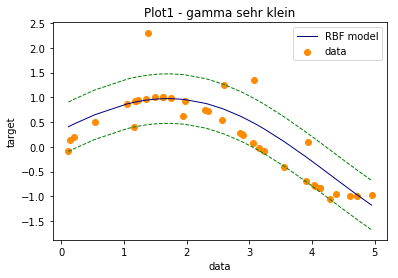

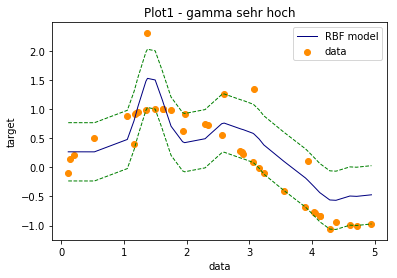

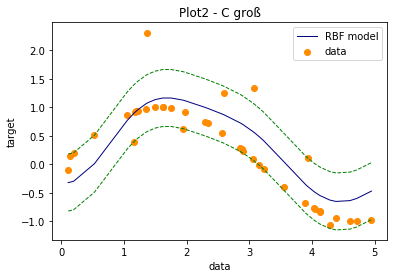

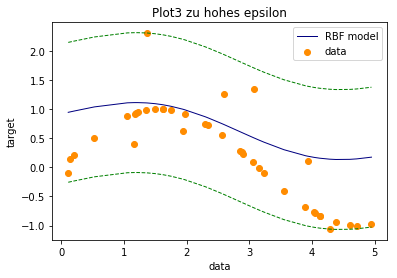

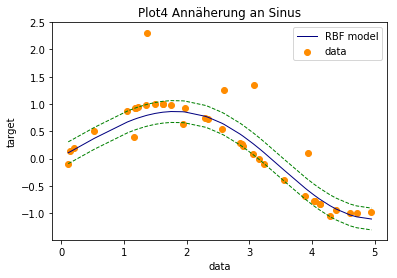

In [76]:
# Plot 1
svmRegressionWithRBF(X, y, 8.0, 0.05, 0.5, 'Plot1 - gamma sehr klein')
svmRegressionWithRBF(X, y, 6.0, 10.3, 0.5, 'Plot1 - gamma sehr hoch')
# Plot 2
svmRegressionWithRBF(X, y, 1000.0, 0.3, 0.5, 'Plot2 - C groß')
# Plot 3
svmRegressionWithRBF(X, y, 8.0, 0.3, 1.2, 'Plot3 zu hohes epsilon')
# Plot 4
svmRegressionWithRBF(X, y, 6.0, 0.3, 0.20, 'Plot4 Annäherung an Sinus')

### Parameter C:
Der Parameter C beschreibt ein Gewichtungsmaß für die einzelnen Trainingssamples und damit den Zusammenhang zwischen der Komplexität der Funktion und der tolerierten Abweichung von Samples. Wenn C groß ist, haben auch Ausreißer eine Gewichtung und fließen in die Regression mit ein, d.h. mehr Muster werden in den unempfindlichen Bereich gezwungen. Dies hat allerdings zu eine Steigerung der Komplexität zur Folge. Für ein kleineres C werden Samples außerhalb der Grenze C für die Schätzung ignoriert.

In Plot3 kann man sehen, dass durch das hoch eingestellte C (1000) die angenäherte Sinuskurve auch sehr von den Ausreißern beeinflusst wird. Es wirkt als würden diese an der Funktion ziehen.

### Parameter e (epsilon):
Der Parameter epsilon bestimmt die Breite des unempfindlichen Bereichs ober- und unterhalb der Regressionsfunktion in dem die Daten nicht zur Funktionsbestimmung berücksichtigt werden. Dies beeinflusst die resultierende Anzahl der Supportvektoren und deshalb die Komplexität der Funktion. 
Je größer e, desto größer ist der unempfindliche Bereich. Aber, mit einem zu hohen Wert wird die Funktion flach (siehe Plot3). 

Hat man bereits eine gute Regressionsfunktion gefunden, kann man durch langsames erhöhen von e die Anzahl der Supportvektoren noch verringern.

### Parameter sigma:
Der Parameter sigma steckt hier im Parameter gamma und zwar als Inverse der Standardabweichung des RBF-Kernels.

Als Formel ausgedrückt: gamma = 1/(2*sigma^2)

Das gamma legt die Steifigkeit der Regressionsfunktion fest. Das hat auch Einfluss darauf ob die Funktion eher glatt oder sich eckig an die Support-Vektoren anpasst. 

Plot1 zeigt eine Regressionsfunktion mit einem geringen gamma (0.1), wodurch ein steife Funktion abgeschätzt wird, die den Sinusbogen nicht gut abbilden kann.

Im Bild "Plot2" im Gegensatz zu "Plot1" kann man sehen, dass durch ein größeres Gamma (=> kleineres sigma), d.h. eine geringere Varianz, Punkte nur als ähnlich aufgefasst werden wenn sie näher aneinander liegen, was zu einer eckigen Regressionsfunktion führt durch mehr Support-Vektoren.

Plot 4 zeigt eine Annäherung an den Sinus, bei der Ausreißer die Abschätzung wenig beeinflussen und die Anzahl der Supportvektoren niedrig gehalten ist.